# Analyzing Tabular Data using Python and Pandas
## Importing Library and Reading CSV File

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

covid_df = pd.read_csv("italy-covid-daywise.csv")
print(covid_df)

           date  new_cases  new_deaths  new_tests
0    2019-12-31        0.0         0.0        NaN
1    2020-01-01        0.0         0.0        NaN
2    2020-01-02        0.0         0.0        NaN
3    2020-01-03        0.0         0.0        NaN
4    2020-01-04        0.0         0.0        NaN
..          ...        ...         ...        ...
243  2020-08-30     1444.0         1.0    53541.0
244  2020-08-31     1365.0         4.0    42583.0
245  2020-09-01      996.0         6.0    54395.0
246  2020-09-02      975.0         8.0        NaN
247  2020-09-03     1326.0         6.0        NaN

[248 rows x 4 columns]


## Retrieving data from DataFrame

In [34]:
# Print a Column
print(covid_df["new_cases"])

# Print a specific value in Row and Column
print(covid_df["new_deaths"][120])

# Print all values in a Row
print(covid_df.loc[77])

# Another form of print a specific value in Row and Column
print(covid_df.at[200, "new_tests"])

# Print 2 Column
print(covid_df[['date', 'new_cases']])

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64
382.0
date          2020-03-17
new_cases         4000.0
new_deaths         347.0
new_tests            NaN
Name: 77, dtype: object
27569.0
           date  new_cases
0    2019-12-31        0.0
1    2020-01-01        0.0
2    2020-01-02        0.0
3    2020-01-03        0.0
4    2020-01-04        0.0
..          ...        ...
243  2020-08-30     1444.0
244  2020-08-31     1365.0
245  2020-09-01      996.0
246  2020-09-02      975.0
247  2020-09-03     1326.0

[248 rows x 2 columns]


## Analyzing data from data frames

Q: What are the total number of reported cases and deaths related to Covid-19 in Italy?

In [35]:
total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()

print('The number of reported cases is {} and the number of reported deaths is {}.'.format(int(total_cases), int(total_deaths)))

The number of reported cases is 271515 and the number of reported deaths is 35497.


Q: What is the overall death rate (ratio of reported deaths to reported cases)?

In [36]:
death_rate = covid_df.new_deaths.sum() / covid_df.new_cases.sum()

print("The overall reported death rate in Italy is {:.2f} %.".format(death_rate*100))

The overall reported death rate in Italy is 13.07 %.


Q: What is the overall number of tests conducted? A total of 935310 tests were conducted before daily test numbers were reported

In [37]:
initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()

print(total_tests)

5214766.0


Q: What fraction of tests returned a positive result?

In [38]:
positive_rate = total_cases / total_tests

print('{:.2f}% of tests in Italy led to a positive diagnosis.'.format(positive_rate*100))

5.21% of tests in Italy led to a positive diagnosis.


## Querying and sorting rows

Look only at the days which had more than 1000 reported cases

In [39]:
high_cases_df = covid_df[covid_df["new_cases"] > 1000]

print(high_cases_df)

           date  new_cases  new_deaths  new_tests
68   2020-03-08     1247.0        36.0        NaN
69   2020-03-09     1492.0       133.0        NaN
70   2020-03-10     1797.0        98.0        NaN
72   2020-03-12     2313.0       196.0        NaN
73   2020-03-13     2651.0       189.0        NaN
..          ...        ...         ...        ...
241  2020-08-28     1409.0         5.0    65135.0
242  2020-08-29     1460.0         9.0    64294.0
243  2020-08-30     1444.0         1.0    53541.0
244  2020-08-31     1365.0         4.0    42583.0
247  2020-09-03     1326.0         6.0        NaN

[72 rows x 4 columns]


Determine the days when the ratio of cases reported to tests conducted is higher than the overall positive_rate.

In [40]:
high_ratio_df = covid_df[covid_df.new_cases / covid_df.new_tests > positive_rate]

print(high_ratio_df)

           date  new_cases  new_deaths  new_tests
111  2020-04-20     3047.0       433.0     7841.0
112  2020-04-21     2256.0       454.0    28095.0
113  2020-04-22     2729.0       534.0    44248.0
114  2020-04-23     3370.0       437.0    37083.0
116  2020-04-25     3021.0       420.0    38676.0
117  2020-04-26     2357.0       415.0    24113.0
118  2020-04-27     2324.0       260.0    26678.0
120  2020-04-29     2091.0       382.0    38589.0
123  2020-05-02     1965.0       269.0    31231.0
124  2020-05-03     1900.0       474.0    27047.0
125  2020-05-04     1389.0       174.0    22999.0
128  2020-05-07     1444.0       369.0    13665.0


Add a new column (Positive Rate) to the data frame

In [41]:
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests

print(covid_df)

           date  new_cases  new_deaths  new_tests  positive_rate
0    2019-12-31        0.0         0.0        NaN            NaN
1    2020-01-01        0.0         0.0        NaN            NaN
2    2020-01-02        0.0         0.0        NaN            NaN
3    2020-01-03        0.0         0.0        NaN            NaN
4    2020-01-04        0.0         0.0        NaN            NaN
..          ...        ...         ...        ...            ...
243  2020-08-30     1444.0         1.0    53541.0       0.026970
244  2020-08-31     1365.0         4.0    42583.0       0.032055
245  2020-09-01      996.0         6.0    54395.0       0.018311
246  2020-09-02      975.0         8.0        NaN            NaN
247  2020-09-03     1326.0         6.0        NaN            NaN

[248 rows x 5 columns]


Remove the positive_rate column using the drop method

In [42]:
covid_df.drop(columns=['positive_rate'], inplace=True)

print(covid_df)

           date  new_cases  new_deaths  new_tests
0    2019-12-31        0.0         0.0        NaN
1    2020-01-01        0.0         0.0        NaN
2    2020-01-02        0.0         0.0        NaN
3    2020-01-03        0.0         0.0        NaN
4    2020-01-04        0.0         0.0        NaN
..          ...        ...         ...        ...
243  2020-08-30     1444.0         1.0    53541.0
244  2020-08-31     1365.0         4.0    42583.0
245  2020-09-01      996.0         6.0    54395.0
246  2020-09-02      975.0         8.0        NaN
247  2020-09-03     1326.0         6.0        NaN

[248 rows x 4 columns]


Sorting rows using column values

In [43]:
print(covid_df.sort_values('new_cases', ascending=False).head(10))      # Shows only 10 first rows

          date  new_cases  new_deaths  new_tests
82  2020-03-22     6557.0       795.0        NaN
87  2020-03-27     6153.0       660.0        NaN
81  2020-03-21     5986.0       625.0        NaN
89  2020-03-29     5974.0       887.0        NaN
88  2020-03-28     5959.0       971.0        NaN
83  2020-03-23     5560.0       649.0        NaN
80  2020-03-20     5322.0       429.0        NaN
85  2020-03-25     5249.0       743.0        NaN
90  2020-03-30     5217.0       758.0        NaN
86  2020-03-26     5210.0       685.0        NaN


Let's look at some days before and after Jun 20, 2020

In [44]:
print(covid_df.loc[169:175])

           date  new_cases  new_deaths  new_tests
169  2020-06-17      210.0        34.0    33957.0
170  2020-06-18      328.0        43.0    32921.0
171  2020-06-19      331.0        66.0    28570.0
172  2020-06-20     -148.0        47.0    29875.0
173  2020-06-21      264.0        49.0    24581.0
174  2020-06-22      224.0        24.0    16152.0
175  2020-06-23      221.0        23.0    23225.0


Replace data entry error (172, "new_cases") with the average of the values on the previous & next date

In [45]:
covid_df.at[172, 'new_cases'] = (covid_df.at[171, 'new_cases'] + covid_df.at[173, 'new_cases'])/2

print(covid_df.loc[169:175])

           date  new_cases  new_deaths  new_tests
169  2020-06-17      210.0        34.0    33957.0
170  2020-06-18      328.0        43.0    32921.0
171  2020-06-19      331.0        66.0    28570.0
172  2020-06-20      297.5        47.0    29875.0
173  2020-06-21      264.0        49.0    24581.0
174  2020-06-22      224.0        24.0    16152.0
175  2020-06-23      221.0        23.0    23225.0


## Working with dates

Convert the date (type : object) into a datetime column using the pd.to_datetime method

In [46]:
covid_df['date'] = pd.to_datetime(covid_df.date)

print(covid_df["date"])

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]


Extract different parts of the data into separate columns, using the DatetimeIndex

In [47]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

print(covid_df)

          date  new_cases  new_deaths  new_tests  year  month  day  weekday
0   2019-12-31        0.0         0.0        NaN  2019     12   31        1
1   2020-01-01        0.0         0.0        NaN  2020      1    1        2
2   2020-01-02        0.0         0.0        NaN  2020      1    2        3
3   2020-01-03        0.0         0.0        NaN  2020      1    3        4
4   2020-01-04        0.0         0.0        NaN  2020      1    4        5
..         ...        ...         ...        ...   ...    ...  ...      ...
243 2020-08-30     1444.0         1.0    53541.0  2020      8   30        6
244 2020-08-31     1365.0         4.0    42583.0  2020      8   31        0
245 2020-09-01      996.0         6.0    54395.0  2020      9    1        1
246 2020-09-02      975.0         8.0        NaN  2020      9    2        2
247 2020-09-03     1326.0         6.0        NaN  2020      9    3        3

[248 rows x 8 columns]


Query the rows for May, choose a subset of columns, and use the sum method to aggregate each selected column's values

In [48]:
# Query the rows for May
covid_df_may = covid_df[covid_df.month == 5]

# Extract the subset of columns to be aggregated
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]

# Get the column-wise sum
covid_may_totals = covid_df_may_metrics.sum()

print(covid_may_totals)
print(type(covid_may_totals))

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64
<class 'pandas.core.series.Series'>


Check if the number of cases reported on Sundays is higher than the average number of cases reported every day

In [49]:
# Overall average
print(covid_df.new_cases.mean())

# Average for Sundays
print(covid_df[covid_df.weekday == 6].new_cases.mean())

1096.6149193548388
1247.2571428571428


## Grouping and aggregation

Summarize the day-wise data and create a new dataframe with month-wise data

[ 1  2  3  4  5  6  7  8  9 12]


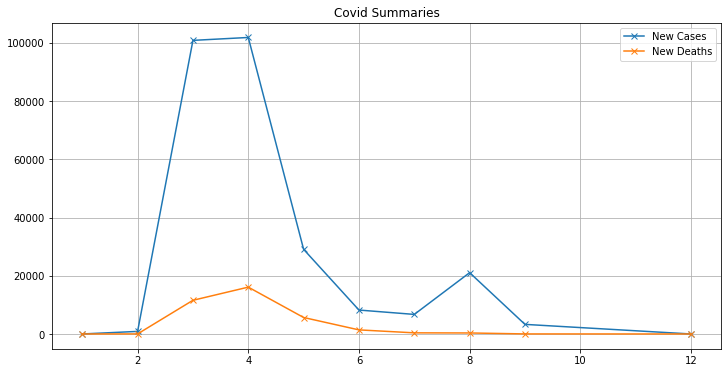

In [91]:
# We can use the groupby function to create a group for each month, select the columns we wish to aggregate, and aggregate them using the sum method
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()
covid_month = covid_df["month"].sort_values().unique()

print(covid_month)

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 6))
# ax.plot(covid_month, covid_month_df["new_tests"], label="New Tests")
ax.plot(covid_month, covid_month_df["new_cases"], 'x-', label="New Cases")
ax.plot(covid_month, covid_month_df["new_deaths"], 'x-', label="New Deaths")
plt.grid(True)
plt.title("Covid Summaries")
ax.legend()

plt.show()

Compute the average number of daily new cases, deaths, and tests for each month

In [51]:
covid_month_mean_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].mean()

print(covid_month_mean_df)

         new_cases  new_deaths     new_tests
month                                       
1         0.096774    0.000000           NaN
2        30.517241    0.724138           NaN
3      3253.258065  373.225806           NaN
4      3395.066667  536.366667  38144.636364
5       937.838710  182.516129  34797.419355
6       273.916667   46.800000  27678.466667
7       216.838710   12.516129  25732.000000
8       679.354839   11.129032  35442.064516
9      1099.000000    6.666667  54395.000000
12        0.000000    0.000000           NaN


Cumulative sum of cases, tests, or death up to each row's date

In [52]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()
covid_df['total_tests'] = covid_df.new_tests.cumsum() + initial_tests

print(covid_df)

          date  new_cases  new_deaths  new_tests  year  month  day  weekday  \
0   2019-12-31        0.0         0.0        NaN  2019     12   31        1   
1   2020-01-01        0.0         0.0        NaN  2020      1    1        2   
2   2020-01-02        0.0         0.0        NaN  2020      1    2        3   
3   2020-01-03        0.0         0.0        NaN  2020      1    3        4   
4   2020-01-04        0.0         0.0        NaN  2020      1    4        5   
..         ...        ...         ...        ...   ...    ...  ...      ...   
243 2020-08-30     1444.0         1.0    53541.0  2020      8   30        6   
244 2020-08-31     1365.0         4.0    42583.0  2020      8   31        0   
245 2020-09-01      996.0         6.0    54395.0  2020      9    1        1   
246 2020-09-02      975.0         8.0        NaN  2020      9    2        2   
247 2020-09-03     1326.0         6.0        NaN  2020      9    3        3   

     total_cases  total_deaths  total_tests  
0    

## Merging data from multiple sources

To determine other metrics like test per million, cases per million, etc., we require some more information about the country, viz. its population. Lets open another csv data

In [53]:
locations_df = pd.read_csv('countries_health1.csv')

print(locations_df)
print(locations_df[locations_df["location"] == "Italy"])

          location continent    population  life_expectancy  \
0      Afghanistan      Asia  3.892834e+07            64.83   
1          Albania    Europe  2.877800e+06            78.57   
2          Algeria    Africa  4.385104e+07            76.88   
3          Andorra    Europe  7.726500e+04            83.73   
4           Angola    Africa  3.286627e+07            61.15   
..             ...       ...           ...              ...   
207          Yemen      Asia  2.982597e+07            66.12   
208         Zambia    Africa  1.838396e+07            63.89   
209       Zimbabwe    Africa  1.486293e+07            61.49   
210          World       NaN  7.794799e+09            72.58   
211  International       NaN           NaN              NaN   

     hospital_beds_per_thousand  gdp_per_capita  
0                         0.500        1803.987  
1                         2.890       11803.431  
2                         1.900       13913.839  
3                           NaN            

We can merge this data into our existing data frame by adding more columns. However, to merge two data frames, we need at least one common column. Let's insert a `location` column in the `covid_df` dataframe with all values set to `"Italy"`.

In [54]:
covid_df['location'] = "Italy"

print(covid_df)

          date  new_cases  new_deaths  new_tests  year  month  day  weekday  \
0   2019-12-31        0.0         0.0        NaN  2019     12   31        1   
1   2020-01-01        0.0         0.0        NaN  2020      1    1        2   
2   2020-01-02        0.0         0.0        NaN  2020      1    2        3   
3   2020-01-03        0.0         0.0        NaN  2020      1    3        4   
4   2020-01-04        0.0         0.0        NaN  2020      1    4        5   
..         ...        ...         ...        ...   ...    ...  ...      ...   
243 2020-08-30     1444.0         1.0    53541.0  2020      8   30        6   
244 2020-08-31     1365.0         4.0    42583.0  2020      8   31        0   
245 2020-09-01      996.0         6.0    54395.0  2020      9    1        1   
246 2020-09-02      975.0         8.0        NaN  2020      9    2        2   
247 2020-09-03     1326.0         6.0        NaN  2020      9    3        3   

     total_cases  total_deaths  total_tests locatio

Add the columns from locations_df into covid_df using the .merge method.

In [55]:
merged_df = covid_df.merge(locations_df, on="location")

print(merged_df)

          date  new_cases  new_deaths  new_tests  year  month  day  weekday  \
0   2019-12-31        0.0         0.0        NaN  2019     12   31        1   
1   2020-01-01        0.0         0.0        NaN  2020      1    1        2   
2   2020-01-02        0.0         0.0        NaN  2020      1    2        3   
3   2020-01-03        0.0         0.0        NaN  2020      1    3        4   
4   2020-01-04        0.0         0.0        NaN  2020      1    4        5   
..         ...        ...         ...        ...   ...    ...  ...      ...   
243 2020-08-30     1444.0         1.0    53541.0  2020      8   30        6   
244 2020-08-31     1365.0         4.0    42583.0  2020      8   31        0   
245 2020-09-01      996.0         6.0    54395.0  2020      9    1        1   
246 2020-09-02      975.0         8.0        NaN  2020      9    2        2   
247 2020-09-03     1326.0         6.0        NaN  2020      9    3        3   

     total_cases  total_deaths  total_tests locatio

Calculate metrics like cases per million, deaths per million, and tests per million

In [56]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population

print(merged_df)

          date  new_cases  new_deaths  new_tests  year  month  day  weekday  \
0   2019-12-31        0.0         0.0        NaN  2019     12   31        1   
1   2020-01-01        0.0         0.0        NaN  2020      1    1        2   
2   2020-01-02        0.0         0.0        NaN  2020      1    2        3   
3   2020-01-03        0.0         0.0        NaN  2020      1    3        4   
4   2020-01-04        0.0         0.0        NaN  2020      1    4        5   
..         ...        ...         ...        ...   ...    ...  ...      ...   
243 2020-08-30     1444.0         1.0    53541.0  2020      8   30        6   
244 2020-08-31     1365.0         4.0    42583.0  2020      8   31        0   
245 2020-09-01      996.0         6.0    54395.0  2020      9    1        1   
246 2020-09-02      975.0         8.0        NaN  2020      9    2        2   
247 2020-09-03     1326.0         6.0        NaN  2020      9    3        3   

     total_cases  total_deaths  total_tests locatio

## Writing data back to files

In [57]:
result_df = merged_df[['date',
                       'new_cases', 
                       'total_cases', 
                       'new_deaths', 
                       'total_deaths', 
                       'new_tests', 
                       'total_tests', 
                       'cases_per_million', 
                       'deaths_per_million', 
                       'tests_per_million']]

print(result_df)

          date  new_cases  total_cases  new_deaths  total_deaths  new_tests  \
0   2019-12-31        0.0          0.0         0.0           0.0        NaN   
1   2020-01-01        0.0          0.0         0.0           0.0        NaN   
2   2020-01-02        0.0          0.0         0.0           0.0        NaN   
3   2020-01-03        0.0          0.0         0.0           0.0        NaN   
4   2020-01-04        0.0          0.0         0.0           0.0        NaN   
..         ...        ...          ...         ...           ...        ...   
243 2020-08-30     1444.0     267298.5         1.0       35473.0    53541.0   
244 2020-08-31     1365.0     268663.5         4.0       35477.0    42583.0   
245 2020-09-01      996.0     269659.5         6.0       35483.0    54395.0   
246 2020-09-02      975.0     270634.5         8.0       35491.0        NaN   
247 2020-09-03     1326.0     271960.5         6.0       35497.0        NaN   

     total_tests  cases_per_million  deaths_per_mil

Write the data from the data frame into a file

In [58]:
# For storage limitting purpose, this function is commented out
# result_df.to_csv('results.csv', index=None)